In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("WTA_Student_Scores_1000.csv")
df

,Student,Math Score,Science Score,English Score
0,Student_1,90,57,96
1,Student_2,95,75,79
2,Student_3,63,82,46
3,Student_4,65,93,90
4,Student_5,85,60,42
...,...,...,...,...
995,Student_996,50,82,77
996,Student_997,65,55,57
997,Student_998,93,66,40
998,Student_999,43,64,52


In [5]:
df_top5 = df.head(5)

In [16]:
df_top5 = df.head(5)
students = df_top5['Student'].values
subjects = ['Math Score', 'Science Score', 'English Score']
normalized_scores = df_top5[subjects].values / 100


In [17]:
rounds = 10
E0 = 1.0
m = 0.1
time_steps = np.arange(rounds)
energy = E0 - m * time_steps
energy = np.clip(energy, 0, None)

In [18]:
subject_performance = {subject: np.zeros((5, rounds)) for subject in subjects}
for i in range(5):
    for j, subject in enumerate(subjects):
        for t in range(rounds):
            subject_performance[subject][i, t] = normalized_scores[i, j] * energy[t]

C:\Users\annie\AppData\Local\Temp\ipykernel_24036\3247125068.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(students, rotation=45)


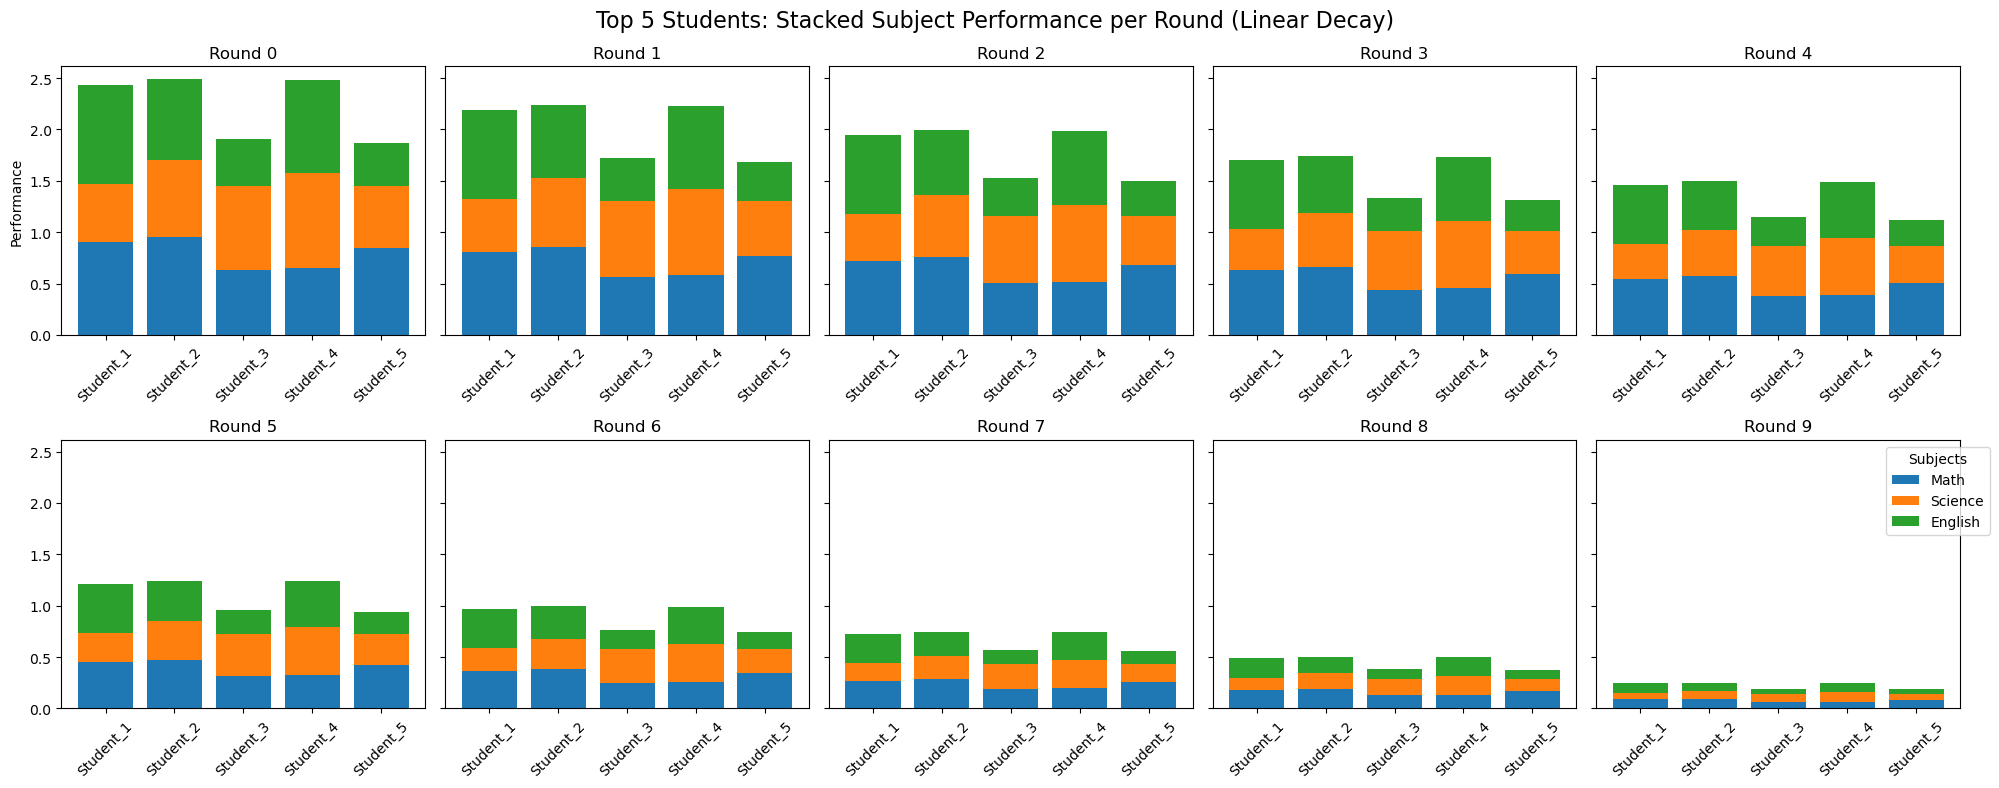

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharey=True)
axes = axes.flatten()

for t in range(rounds):
    ax = axes[t]
    bottom = np.zeros(5)
    for j, subject in enumerate(subjects):
        bar_values = [subject_performance[subject][i, t] for i in range(5)]
        ax.bar(students, bar_values, bottom=bottom, label=subject.split()[0])
        bottom += bar_values
    ax.set_title(f"Round {t}")
    ax.set_xticklabels(students, rotation=45)

axes[0].set_ylabel("Performance")
axes[-1].legend(title="Subjects", bbox_to_anchor=(1.1, 1.0))
fig.suptitle("Top 5 Students: Stacked Subject Performance per Round (Linear Decay)", fontsize=16)
plt.tight_layout()
plt.show()
